In [1]:
import pathlib

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from etl import MidiFileInfo

Test genre tags method:

In [2]:
file_path = '../data_raw/lmd_matched/A/A/A/TRAAAGR128F425B14B/1d9d16a9da90c090809c153754823c2b.mid'
info = MidiFileInfo(file_path)
info.get_genre_tags()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../data_raw/lmd_matched_h5/A/A/A/TRAAAGR128F425B14B.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Compile frequencies and weights of all genre tags in dataset:

In [7]:
parent = pathlib.Path('..')
file_paths = map(str, parent.rglob('*.mid'))

distribution_raw = {}
distribution_weighted= {}
for file in tqdm(file_paths):
    info = MidiFileInfo(file)
    genre_tags = info.get_genre_tags()
    for tag, weight in genre_tags:
        if tag not in distribution_raw:
            distribution_raw[tag] = 1
            distribution_weighted[tag] = weight
        else:
            distribution_raw[tag] += 1
            distribution_weighted[tag] += weight

116189it [16:29, 117.46it/s]


Plot top 20 genres in dataset for both raw and weighted frequencies:

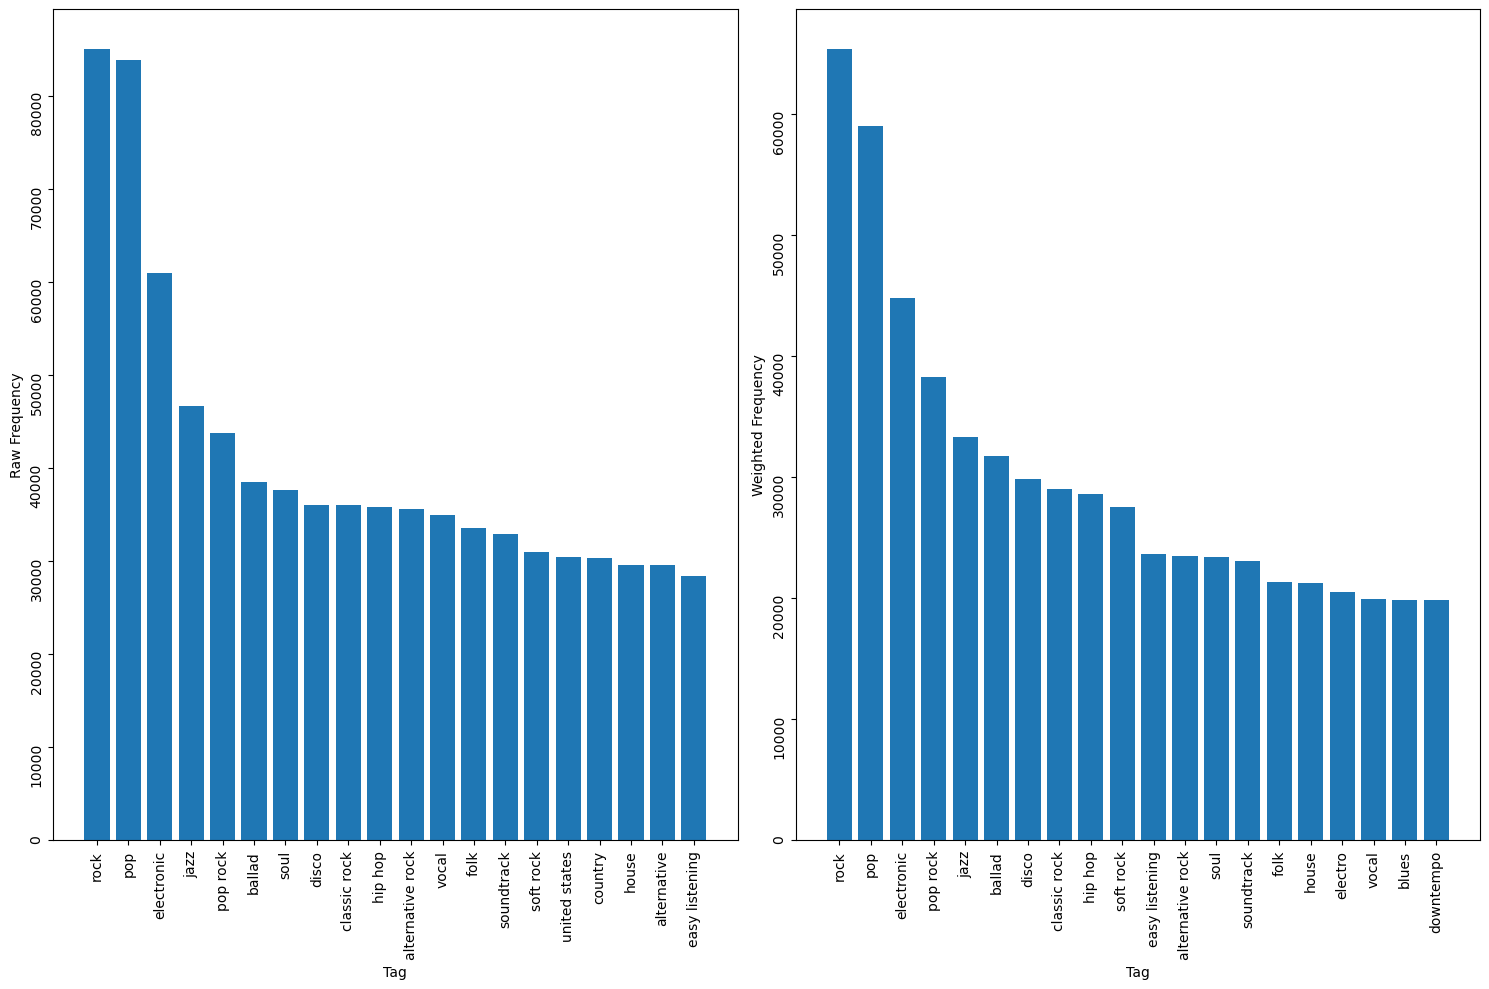

In [12]:
raw_tuples = sorted(zip(distribution_raw.values(), distribution_raw.keys()), reverse=True)
weighted_tuples = sorted(zip(distribution_weighted.values(), distribution_weighted.keys()), reverse=True)
y_raw, x_raw = [t[0] for t in raw_tuples[0:20]], [t[1] for t in raw_tuples[0:20]]
y_weighted, x_weighted = [t[0] for t in weighted_tuples[0:20]], [t[1] for t in weighted_tuples[0:20]]

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
bar_raw = ax[0].bar(x_raw, y_raw)
ax[0].set_xlabel('Tag')
ax[0].set_ylabel('Raw Frequency')
ax[0].tick_params(labelrotation=90)
bar_weighted = ax[1].bar(x_weighted, y_weighted)
ax[1].set_xlabel('Tag')
ax[1].set_ylabel('Weighted Frequency')
ax[1].tick_params(labelrotation=90)

plt.tight_layout()
plt.show()